<a href="https://colab.research.google.com/github/radhika3131/Deep_Learning_with_Python/blob/main/ch_02_Introduction_to_Keras_and_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Constant tensor and variables

To do anything in tensor . we are  going to need some tensors. tensor need to be  created with some initial value 

All-ones or all-zeros tensors

In [1]:
import tensorflow as tf 
x = tf.ones(shape = (2,1)) # equivalent to np.ones(shape = (2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape = (2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Random Tensors

In [3]:
# tensor of random values of normal distribution with mean 0 and standard deviation 1
x = tf.random.normal(shape = (3,1) , mean = 0. , stddev = 1. )
print(x)

tf.Tensor(
[[ 0.1459504 ]
 [-0.36910313]
 [ 1.6335238 ]], shape=(3, 1), dtype=float32)


In [4]:
# tensor of random values of uniform distribution between 0 and 1 
x = tf.random.uniform(shape = (3,1) , minval = 0. , maxval = 1.)
print(x)

tf.Tensor(
[[0.11145246]
 [0.9740274 ]
 [0.7467369 ]], shape=(3, 1), dtype=float32)


A significant difference between Numpy and tensorFlow tensors is that tensorFlow tensors are not assignable .they are constant .For instance , in Numpy you can do the following:

Numpy arrays are assignable

In [5]:
import numpy as np
x = np.ones(shape = (2,2))
x[0,0] = 0
print(x)

[[0. 1.]
 [1. 1.]]


TensorFlow tensors are not assignable

**try to do the same thing in tensorFlow you will get error**


In [6]:
x = tf.ones(shape = (2,2))
x[0,0] = 0
print(x)

TypeError: ignored

To train a model , we will need to update its state, which is set of tensors . If tensors are not asignable , how do we do it ? that where come **variables** come in tf.varible is the class meant to manage modifiable state in tensorflow

Creating a Tensorflow variable

In [8]:
v = tf.Variable(initial_value = tf.random.normal(shape = (3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.5982915 ],
       [ 0.15294123],
       [-0.22419946]], dtype=float32)>


Assugning value to tensorflow variable

In [9]:
v.assign(tf.ones(shape = (3, 1 )))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

Assigning a value to a subset of a tensorflow variables

In [10]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Using assign_add()

In [11]:
# similarly assign_add() and assign_Sub() are efficient equivalent of += and -= 
v.assign_add(tf.ones(shape = (3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

Tensor operation : Doing math in TensorFlow

In [12]:
a = tf.ones(2,2)
b = tf.square(a) # take the squares
c = tf.sqrt(a) # take the square root
d = b+c # add two tensors


A second look at the GradientTape API

So far , TensorFlow seems to look a lot like Numpy. But here something Numpy can'nt do : retrieve the gradient of any differentiable ex[pression with respect to any of its inputs . Just open s **GradientTape** scope , apply  some computation to one or serveral input tensors , and retrieve the gradient of the result with respect to the inputs

In [13]:
input_var = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result , input_var)

So far , you have only seen the case where the input tensors in tape.gradient()
were TensorFlow variables . Its actually possible for thes inputs to be any arbitrary tenor . However , only trainable varibles are tracked by default . With a constant tensor  you would have to manually mark it as being tracked by calling **Tape.watch** on it

Using GradientTape with constant tensor inputs

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result , input_const)

# why is it necessary to mark becz it would be too expensive to preemptively store the information required to compute the gradient of anything the respect to anything
# To avoid wasting resources , tape need to know what to watch 

Using Nested gradient tapes to compute second-order gradients

In [15]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
    speed = inner_tape.gradient(position , time)
  acceleration = outer_tape.gradient(speed,time) # we used the outer tape to compute the gradient of the gradient from the inner tap

# An end_to_end example : a Linear classifier in pure TensorFlow

1. lets come up with some nicely separable synthetic data to work with
2. Two class of points in a 2D plane
3.we will generate each class of points by drawing their coordinates fro   random distribution with aspecific  covarience matrix  and  specific mean
4. the covarience matrix describe the shape of the point cloud and mean describe its position in plane 
5. we will reuse the same covarinece matrix for both point clouds , but we will use two different mean values  -- the point cloud will have same  shape but different position

Generating two classes  of random points in a 2D plane

In [16]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean = [0,3] , cov = [[1,0.5] , [0.5 , 1]] , size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean = [3 , 0] , cov = [[1,0.5] , [0.5 , 1]] , size = num_samples_per_class)

In [17]:
negative_samples.shape

(1000, 2)

In [18]:
positive_samples.shape

(1000, 2)

Stacking the two class into an array with shape(2000, 2)

In [19]:
inputs = np.vstack((negative_samples , positive_samples)).astype(np.float32)

In [20]:
inputs

array([[ 0.19194266,  3.9889417 ],
       [-0.43890658,  1.0318993 ],
       [ 0.5218312 ,  3.931077  ],
       ...,
       [ 3.312295  , -0.03728716],
       [ 2.2474139 , -0.71655095],
       [ 1.6535842 ,  0.7089441 ]], dtype=float32)

Generate the corresponding targets (0 and 1)

An array of zeroes and ones of shape(2000, 1) , where target[i,0] is 0 if inputs[i] belongs to class 0 

In [21]:
targets = np.vstack((np.zeros((num_samples_per_class , 1) , dtype = "float32"),
                    np.ones((num_samples_per_class , 1) , dtype = "float32") ))

Plotting the two classes

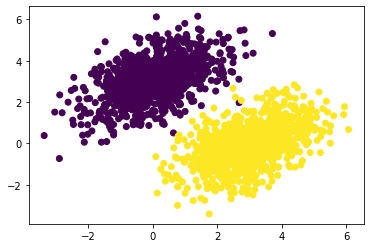

In [22]:
import matplotlib.pyplot as plt 
plt.scatter(inputs[:,0] , inputs[:, 1] , c = targets[:, 0])
plt.show()

Now lets create a linear classifier that can learn to separate these two blobs
A linear classifier ia an affine transformation (** prediction = W* input + b **) trained to minimize the square of difference between predictions and the targets

Creating the linear classifier variables

In [23]:
input_dim = 2 # the inputs will be in 2D
output_dim = 1 # the output predictions will be a single score per sample (close to 0 if sample is predicted to be in class 0 , and close to 1 if samples is predicted to be in class 1)
W = tf.Variable(initial_value = tf.random.uniform (shape = (input_dim , output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim , )))

The forward Pass Function

In [24]:
 def model(inputs):
   return tf.matmul(inputs , W ) + b

Because our linear function operates on 2D inputs . W is really just two scalar coefficents , w1 , w2 : W = [[w1], [w2]] .
meanwhile , b is a single scalar coefficent . As such , for given input point [x, y ] , its predition value is Prediction =[[w1], [w2]] * [ x , y] = w1 * x + w2 * y + b 

The mean squared error loss function

In [25]:
def square_loss(targets , predictions):
  per_sample_losses = tf.square(targets - predictions) # per_sample_losses will be tensor with the same shape as prediction and target , containing per-sample-losses
  return tf.reduce_mean(per_sample_losses) #we need to average these per-sample-losses scores into a single scalar loss value: this is what reduce_mean does

Next is training step , which recieve some training data and updates the weights w and b as to minimize the loss on the data

The Training step function

In [26]:
learning_rate = 0.1

def training_step(inputs , targets):
  with tf.GradientTape() as tape:#                forward pass
    predictions = model(inputs)  #                inside  a gradient tape 
    loss = square_loss(predictions , targets) #    scope
  grad_loss_wrt_W , grad_loss_wrt_b = tape.gradient(loss, [W , b]) # retrieve the gradient of the loss with regard to weights
  W.assign_sub(grad_loss_wrt_W * learning_rate)  #  update the
  b.assign_sub(grad_loss_wrt_b * learning_rate)  #  weights
  return loss


For simplicity we will do batch training instead of mini batch training . we will run  each training  step (gradiet computation and weight update) for all data , rather than iterate through the data in small batches

The batch training loop

In [27]:
for step in range(40):
  loss = training_step(inputs , targets)
  print(f"loss at step {step } : {loss : 4f}")

loss at step 0 :  7.306995
loss at step 1 :  1.102295
loss at step 2 :  0.294745
loss at step 3 :  0.174412
loss at step 4 :  0.148457
loss at step 5 :  0.136159
loss at step 6 :  0.126461
loss at step 7 :  0.117797
loss at step 8 :  0.109896
loss at step 9 :  0.102669
loss at step 10 :  0.096054
loss at step 11 :  0.090001
loss at step 12 :  0.084460
loss at step 13 :  0.079388
loss at step 14 :  0.074747
loss at step 15 :  0.070499
loss at step 16 :  0.066610
loss at step 17 :  0.063051
loss at step 18 :  0.059794
loss at step 19 :  0.056813
loss at step 20 :  0.054084
loss at step 21 :  0.051587
loss at step 22 :  0.049301
loss at step 23 :  0.047209
loss at step 24 :  0.045294
loss at step 25 :  0.043542
loss at step 26 :  0.041938
loss at step 27 :  0.040469
loss at step 28 :  0.039126
loss at step 29 :  0.037896
loss at step 30 :  0.036770
loss at step 31 :  0.035740
loss at step 32 :  0.034797
loss at step 33 :  0.033934
loss at step 34 :  0.033144
loss at step 35 :  0.032421
lo

After 40 steps , te training loss seems to have stabilized around 0.028271

lets plot how are linear model classifies the training data points . becz our targets are zeros and ones , a give input point will be classified  as"0" if its prediction value is below 0.5 and "1" if its above 0.5

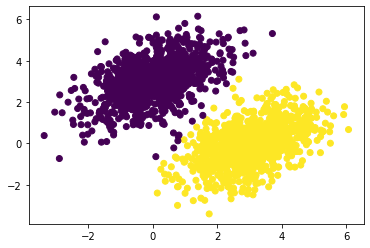

In [28]:
predictions = model(inputs)
plt.scatter(inputs[: , 0] , inputs[: , 1] , c = predictions[: , 0] > 0.5)
plt.show()

Recall prediction value for a given point [x , y] is simply predictions = [[w1], [w2]] * [ x , y] = w1 * x + w2 * y + b . thus class 0 is defined as w1*x + w2*y + b < 0.5 , and class 1  as w1*x + w2*y + b > 0.5

you will notice that what you are looking at is really the equation of a line in the 2D plane w1*x + w2*y + b = 0.5 

Above the line is class 1 and below is class 0 , you may be used to seeing line equations in the format y = a*x =b , in the same format , our line becomes y = -w1 / w2 * x + ( 0.5 - b) / w2

Plot this line

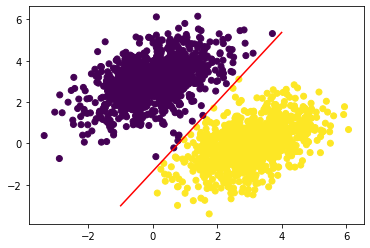

In [29]:
x = np.linspace(-1, 4 , 100) # generate 100 regularly spaced numbers between  -1 and 4  which we will use to plot our line
y = -W[0] / W[1] * x + (0.5 - b) / W[1] # this is our lone equation
plt.plot( x , y , "-r")
plt.scatter(inputs[: , 0] , inputs[: , 1] , c = predictions[: , 0] > 0.5)
plt.show()

# Layers : The building blocks of deep learning 

A layer is a data processing module that takes as input one or more tensors and the output one or more tensors

Different types of layers are appropriate for different tensor formats and different types of data processing . For instance :                            

simple vector data stored in rank- 2 tensor of shape(samples , features) is often processed by densly connected layers  also called fully connected of dense layer.

 A layer is an object that encapsulate some state(weights) and some computation(a forward pass) . The weights are typically defined in a **build()** ( although they can be created in a constructor , ** __init__() ** ). and the computation is defined in the ** call() ** method. 


 * Building deep learning models in keras is done by clipping together compatible layers to form useful data transformation pipelines



A dense layer implemented as alayer subclass

In [30]:
from tensorflow import keras
# all keras layers are inherit from the base Layer class
class SimpleDense(keras.layers.Layer):
  def ___init__(self , units , activation= None):
    super().___init__()
    self.units =units
    self.activation  = activation

# Wight creation take place in build method
  def build(self, input_shape): 
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape = (input_dim , self.units) , intializer = "random_normal") # add weights is a shortcut method for creaing weights . It is also possible to create standalone varables and assign them as layer attributes , like self.W = tf.Variable(tf.random.uniform(w_shape)).
    self.b = self.add_weight(shape = (self.units) , intializer = "zeros")


 # we define the forward pass computation in the call() method
  def call(self , inputs ):
    y = tf.matmul(inputs , self.W ) + self.b 
    if self.activation is not None:
      y = self.activation(y)
    return y 
     


 # Automatic Shape reference : Building layers on the fly

 The notion of layer compatibility here refers specifically to the fact that every layer will only accept input tensors of a certain shape and will return output tensor of a certain shape

In [35]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation = "relu")  # a dense layer with 32 output units

# This layer will return a tensor where the first dimension has been transformed to b 3. it can only be connected to a downstream layer that expects 32 dimensional vectro as input

Using keras , you do not have to waorry about size compatibility most of the time , necz layers you add to your models are dynamically build to match the shape of the incoming inputs

In [41]:
from tensorflow.keras import models
from tensorflow.keras import layers 
model = models.Sequential([
    layers.Dense(32, activation = "relu"),
    layers.Dense(32)
])

# From layers to models

a deep learning model is graph of layers.In keras thats th Model class .
Until now you have only seen sequential model ( a subclass of Model ) which are simpl stacks of layers . mapping a single input to single output. 
There are more network topologies:

* Two-Branch networks
* Multihead networks
* Residual networks

The **Compile** step: configuring the learning process

Once the model architeture is defined , you still have to choose three  more things:
1. loss function - the quatity that will be minimized during training . It represents the measure of success for the task at hand 
2.  optimizer - Determines how the network will be updated based on the loss function  . It implements a specific variant of SGD
3. Metrix - The measures the succes you want to monitor during training and validation , such as classification accuracy

once you have picked your oss , optimizer nd matrix you can built -in compile() and fit() method for training your model 

The Compile() method configures the training process 

In [42]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer = "rmsprop",
              loss = "mean_squared_error",
              metrics = ["accuracy"])

Understanding the **fit()** method

The fit() method implements the training loop itself.


In [43]:
history = model.fit(
    inputs, targets , epochs = 5 , batch_size = 128
)

Epoch 1/5
16/16 [==============================] - 1s 6ms/step - loss: 2.1647 - accuracy: 0.9655
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 1.9959 - accuracy: 0.9640
Epoch 3/5
16/16 [==============================] - 0s 4ms/step - loss: 1.8564 - accuracy: 0.9630
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 1.7250 - accuracy: 0.9620
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 1.6000 - accuracy: 0.9615


In [44]:
history.history

{'loss': [2.164687395095825,
  1.9958863258361816,
  1.8563684225082397,
  1.7250237464904785,
  1.6000059843063354],
 'accuracy': [0.965499997138977,
  0.9639999866485596,
  0.9629999995231628,
  0.9620000123977661,
  0.9614999890327454]}

Monitoring loss and metrics on validation data

To keep an ee on how the model does on new data . its standard practice is to reverse a subset of training data as validation data , you won't be training the model on this data , but you wil use it to compute a loss  and metrics value , you do this by using validation_data argument in fit() method

In [46]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer = "rmsprop",
              loss = "mean_squared_error",
              metrics = ["accuracy"])

indices_permutation = np.random.permutation(len(inputs)) # To avoid having samples from only one class
shuffled_inputs = inputs[indices_permutation]            # in the validation  data , shuffle the inputs and targets
shuffled_targets = targets[indices_permutation]          # using random indices permutation

num_validation_samples = int(0.3 * len(inputs)) # resreve 30% of the training inputs and targets for validation 
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
    training_inputs,training_targets , epochs = 5 , batch_size = 16 , validation_data = (val_inputs , val_targets) # validation data , used only to monitor the validation loss and metrics
)




Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 6.7739 - accuracy: 0.0550 - val_loss: 6.3830 - val_accuracy: 0.0583
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 5.4900 - accuracy: 0.0729 - val_loss: 5.1544 - val_accuracy: 0.0767
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 4.3821 - accuracy: 0.0943 - val_loss: 4.0972 - val_accuracy: 0.0983
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 3.4010 - accuracy: 0.1286 - val_loss: 3.1571 - val_accuracy: 0.1433
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 2.5679 - accuracy: 0.1714 - val_loss: 2.3595 - val_accuracy: 0.1900


The purpose of the validation is to monitor whether  what the model is learning is actually useful on new data , if any of the validation data has been seen by the model during training , your validation loss and metrics will be flawed


Call **evaluate()** mathod if you want to calculate the validation loss and metrics after training is complete

In [48]:
loss_and_metrics = model.evaluate(val_inputs , val_targets , batch_size = 128)

5/5 [==============================] - 0s 4ms/step - loss: 2.3595 - accuracy: 0.1900


Inference : Using a model after training

once you have trained ypur model , you are going to use it on new data to make predctions . This is called inference...To do this , a naive approach would simply be to __call__() the model.

In [50]:
predictions = model.predict(val_inputs , batch_size = 128)
print(predictions[:10])

5/5 [==============================] - 0s 6ms/step
[[ 1.6005989]
 [ 1.9702754]
 [ 2.079118 ]
 [ 2.4344354]
 [-1.459526 ]
 [-0.7596554]
 [ 2.4294453]
 [ 2.7616951]
 [ 2.157334 ]
 [ 1.9642761]]
